In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
# from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop # toi uu

In [2]:
# Initialize Data
path = "../input/vn-trafficsign/TrafficSignVNDataset"
labels = '../input/labelsss/VN_traffic_label.csv'

In [3]:
# Load Images 
count = 0
image = []
label = []
myList = os.listdir(path)
print("Total Classes:",len(myList))
noOfClasses=len(myList)
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        img = np.asarray(curImg)
        img = cv2.resize(img, (32, 32))
        image.append(img)
        label.append(count)
    print(count, end =" ")
    count += 1
print(" ")
image= np.array(image)
label = np.array(label)


Total Classes: 21
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20  


In [4]:
# Print all of image folder
print(myList)

['7', '17', '19', '2', '10', '5', '20', '8', '12', '0', '18', '16', '13', '15', '3', '1', '14', '4', '9', '6', '11']


In [5]:
# Print label
print(len(label))
print(label)

20829
[ 0  0  0 ... 20 20 20]


In [6]:
# Print dimension of image and label
print(image.shape,label.shape)

(20829, 32, 32, 3) (20829,)


In [7]:
# Split data, 80% train, 20% test
X_train, X_test, y_train, y_test1 = train_test_split(image, label, test_size=0.2)
X_train, X_validation, y_train1, y_validation1 = train_test_split(X_train, y_train, test_size=0.2)

In [8]:
# Preprocessing
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     
    img = equalize(img)      
    img = img/255            
    return img
 
X_train=np.array(list(map(preprocessing,X_train)))  
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))

In [9]:
print(X_train.shape, X_test.shape, X_validation.shape)

(13330, 32, 32) (4166, 32, 32) (3333, 32, 32)


In [10]:
# Reshape data
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [11]:
# Create Generator
dataGen= ImageDataGenerator(width_shift_range=0.1,   
                            height_shift_range=0.1,
                            zoom_range=0.2,  
                            shear_range=0.1,  
                            rotation_range=10)  
dataGen.fit(X_train)


In [12]:
# Convert label
y_train = to_categorical(y_train1,noOfClasses)
y_validation = to_categorical(y_validation1,noOfClasses)
y_test = to_categorical(y_test1,noOfClasses)

[192, 1110, 324, 218, 840, 789, 420, 1200, 630, 388, 780, 2178, 2070, 600, 2220, 1410, 1980, 1660, 420, 420, 780]


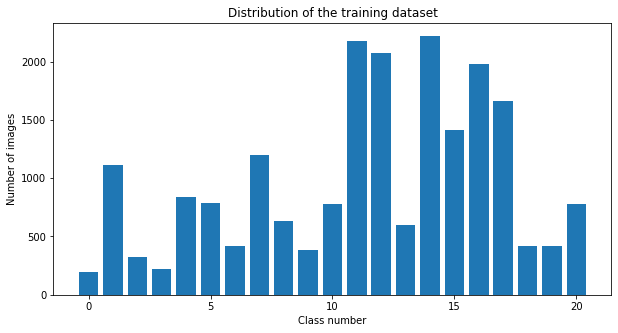

In [13]:
# Draw chart
num_of_samples = [192,1110,324,218,840,789,420,1200,630,388,780,2178,2070,600,2220,1410,1980,1660,420,420,780]
num_classes = 21
print(num_of_samples)
plt.figure(figsize=(10, 5))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [19]:
# Create model 
no_Of_Filters=64
size_of_Filter=(5,5)
                     
size_of_Filter2=(3,3)
size_of_pool=(2,2)  

model= Sequential()
model.add((Conv2D(64,(5,5),input_shape=(32,32,1),activation='relu')))  
model.add((Conv2D(64, (5,5), activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add((Conv2D(32, (3,3),activation='relu')))
model.add((Conv2D(32,(3,3), activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(21,activation='softmax')) 
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 64)        102464    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 32)        18464     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 4, 4, 32)         

In [20]:
# Compile model 
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])
# Training model 
history=model.fit(dataGen.flow(X_train,y_train,batch_size=64),steps_per_epoch=100,epochs=50,validation_data=(X_validation,y_validation),shuffle=1)

Epoch 1/50
100/100 [==============================] - 14s 32ms/step - loss: 2.6301 - accuracy: 0.1798 - val_loss: 1.6936 - val_accuracy: 0.4641
Epoch 2/50
100/100 [==============================] - 3s 28ms/step - loss: 1.8717 - accuracy: 0.3919 - val_loss: 1.0079 - val_accuracy: 0.5839
Epoch 3/50
100/100 [==============================] - 3s 28ms/step - loss: 1.4184 - accuracy: 0.5198 - val_loss: 0.6941 - val_accuracy: 0.8068
Epoch 4/50
100/100 [==============================] - 3s 28ms/step - loss: 1.1441 - accuracy: 0.6083 - val_loss: 0.4707 - val_accuracy: 0.8758
Epoch 5/50
100/100 [==============================] - 3s 29ms/step - loss: 0.8934 - accuracy: 0.7084 - val_loss: 0.2925 - val_accuracy: 0.9169
Epoch 6/50
100/100 [==============================] - 3s 28ms/step - loss: 0.7319 - accuracy: 0.7595 - val_loss: 0.1990 - val_accuracy: 0.9448
Epoch 7/50
100/100 [==============================] - 3s 34ms/step - loss: 0.5902 - accuracy: 0.8136 - val_loss: 0.1488 - val_accuracy: 0.967

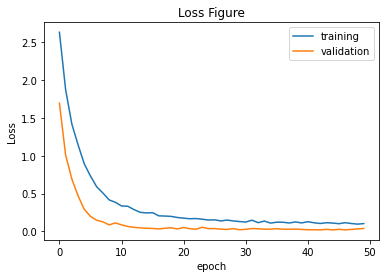

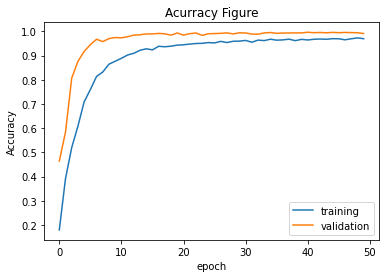

Test Score: 0.023493757471442223
Test Accuracy: 0.9930388927459717


In [21]:
# Plot 
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss Figure')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy Figure')
plt.xlabel('epoch')
plt.ylabel('Accuracy')

plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

In [22]:
# Save model
from tensorflow.keras.models import load_model
model.save('Final_official1.h5')
model_ANN = load_model('Final_official1.h5')

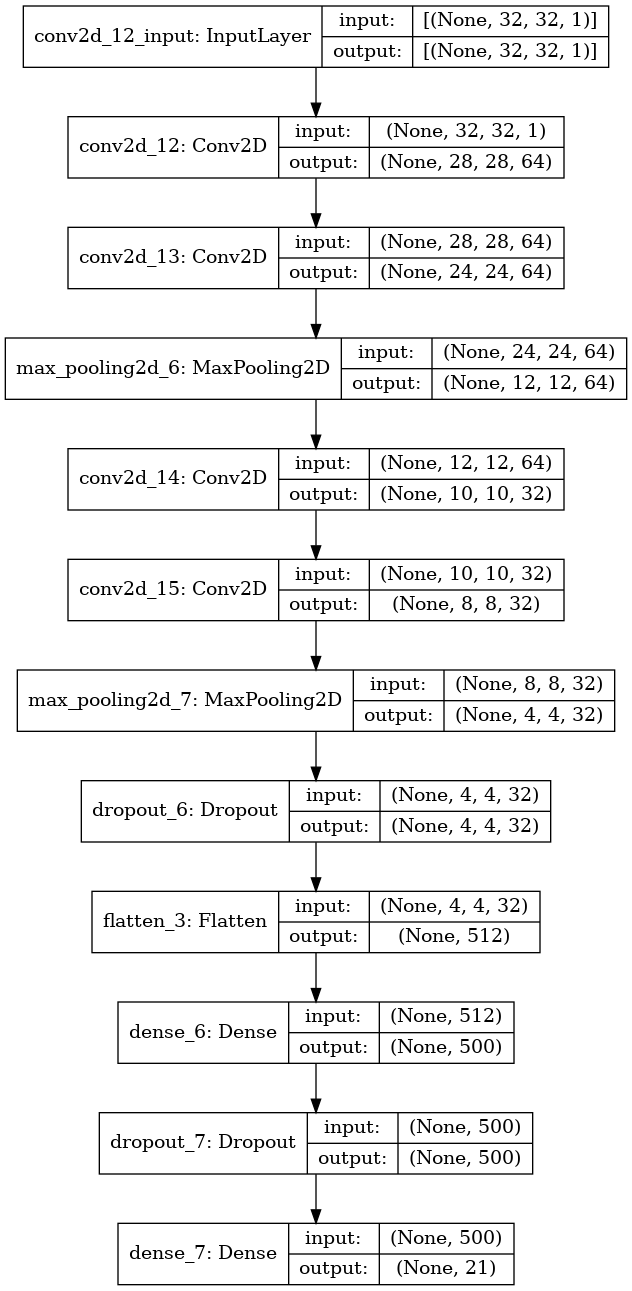

In [23]:
# Visualize model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [27]:
result = np.argmax(model_ANN.predict(X_test),axis=-1)
print(result.shape)

(4166,)


In [34]:
from itertools import product
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(21,16))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

Classification report for classifier <keras.engine.sequential.Sequential object at 0x7f3671638650>:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        39
           1       1.00      1.00      1.00       223
           2       0.96      1.00      0.98        55
           3       0.93      1.00      0.96        40
           4       1.00      1.00      1.00       170
           5       1.00      1.00      1.00       157
           6       1.00      1.00      1.00        82
           7       1.00      1.00      1.00       238
           8       0.98      1.00      0.99       119
           9       1.00      1.00      1.00        94
          10       1.00      1.00      1.00       146
          11       0.99      0.99      0.99       436
          12       1.00      0.99      1.00       395
          13       1.00      1.00      1.00       126
          14       1.00      0.99      0.99       476
          15       0.99      1.00  

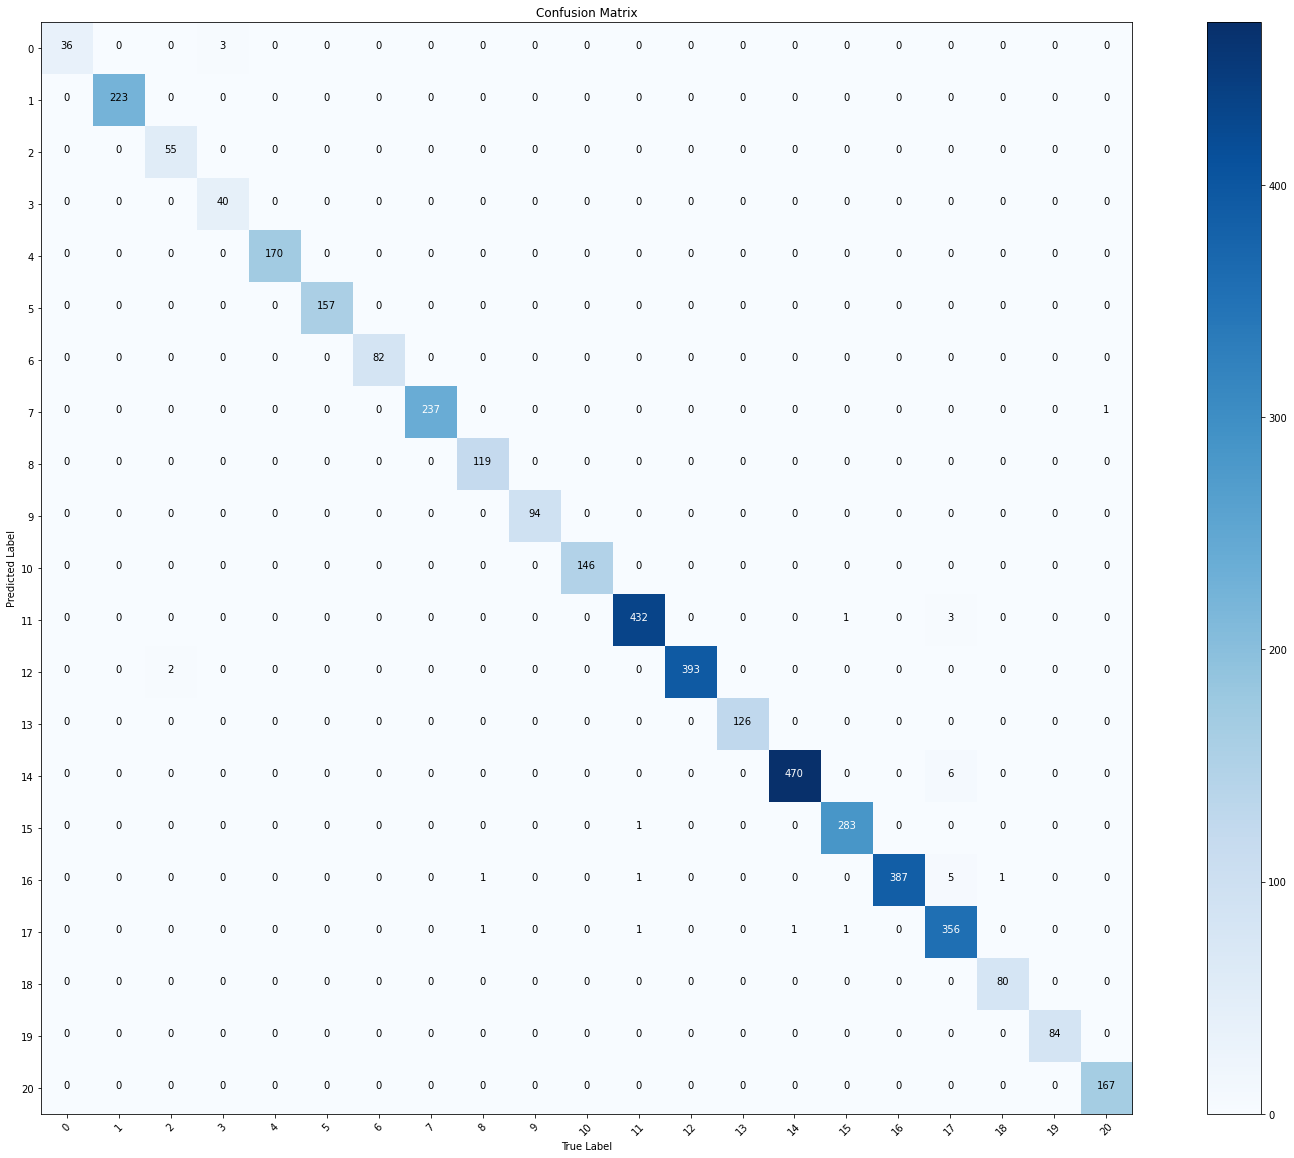

In [35]:
# Draw Confusion Matrix
from sklearn import metrics

y_pred = model.predict(X_test)

Y_pred_classes = np.argmax(y_pred,axis = 1) 

Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

plot_confusion_matrix(confusion_mtx, classes = range(21)) 
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

target_names = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(Y_true, Y_pred_classes, target_names = target_names)))